In [1]:
import os
os.chdir("C:\\Users\\HP\\OneDrive\\Desktop\\Machine Learning\\Logistic Regression")
import pandas as pd 
pd.set_option('display.max_column',None)
#import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
#import statsmodels.formula.api as smf
#from scipy.stats import chi2_contingency
#from sklearn.preprocessing import LabelEncoder 
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import roc_curve, auc, roc_auc_score
#from sklearn.utils import resample

In [2]:
# we need below also 
from sklearn.preprocessing import MinMaxScaler

In [11]:
df = pd.read_csv('iris.csv') #150; 5 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.Species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

Text(0.5, 1.0, 'Barplot of Species')

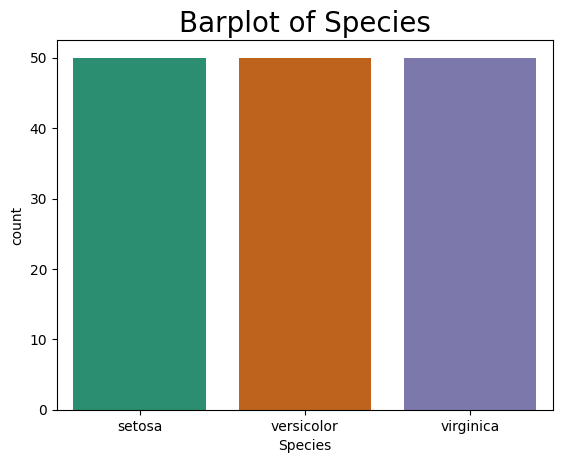

In [13]:
# Bar Plot of Species
sns.countplot(x = 'Species', data = df, palette='Dark2')
plt.title('Barplot of Species', fontsize = 20)


In [14]:
# as Species levels are in text, we need to 
# put nos, see a new way! other than LabelEncoder!

df['target'] = df.Species.astype('category').cat.codes
df.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [15]:
# predictors and target var, X and y
X = df.drop(['Species', 'target'], axis = 1)
y = df.target

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [17]:
df_ovr = LogisticRegression(multi_class= 'ovr')
df_ovr.fit(X,y)

print("oaa_ovr=", df_ovr.score(X,y)) # 0.89

oaa_ovr= 0.8933333333333333


In [18]:
# predictions
pred_ovr = df_ovr.predict(X)

print("ovr\n")
print(metrics.confusion_matrix(y, pred_ovr, labels = [0,1,2]))
print(metrics.classification_report(y, pred_ovr, labels = [0,1,2]))

ovr

[[50  0  0]
 [ 0 37 13]
 [ 0  3 47]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.93      0.74      0.82        50
           2       0.78      0.94      0.85        50

    accuracy                           0.89       150
   macro avg       0.90      0.89      0.89       150
weighted avg       0.90      0.89      0.89       150



In [19]:
#______________another way! not ovr but , multinomial way!
df_mul = LogisticRegression(multi_class= 'multinomial')
df_mul.fit(X,y)

print("oaa=", df_mul.score(X,y)) # ovr =0.89, mul = 0.94

oaa= 0.94


In [20]:
# predictions
pred_mul = df_mul.predict(X)

print("mul\n")
print(metrics.confusion_matrix(y, pred_mul, labels = [0,1,2]))
print(metrics.classification_report(y, pred_mul, labels = [0,1,2]))

mul

[[50  0  0]
 [ 0 45  5]
 [ 0  4 46]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.92      0.90      0.91        50
           2       0.90      0.92      0.91        50

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150

